In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte

In [2]:
IMAGE_PATH = 'piova_night.png'

In [3]:
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)

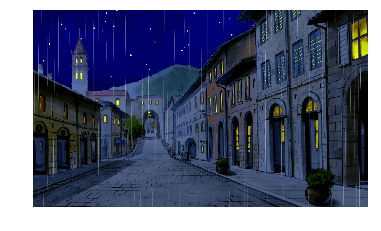

In [4]:
plt.imshow(img[..., ::-1], cmap='gray')
plt.axis('off')
plt.show()

In [5]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [6]:
hue, saturation, value = np.moveaxis(hsv_img, -1, 0)

In [7]:
#Segment the windows
mask_img = hue > 20
mask_img &= hue < 50
mask_img &= value > 100
mask_img = img_as_ubyte(mask_img)

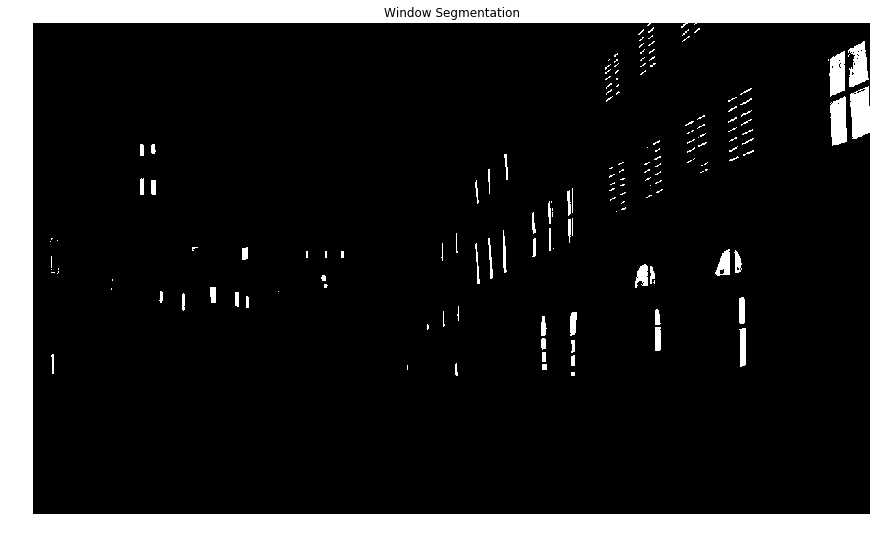

In [8]:
plt.figure(figsize=(15, 15))
plt.imshow(mask_img, cmap='gray')
plt.title('Window Segmentation')
plt.axis('off')
plt.show()

In [9]:
contours, _ = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = [c for c in contours if cv2.contourArea(c) > 0]
contour_img = cv2.drawContours(img.copy(), contours, -1, (255, 255, 255), thickness=2)

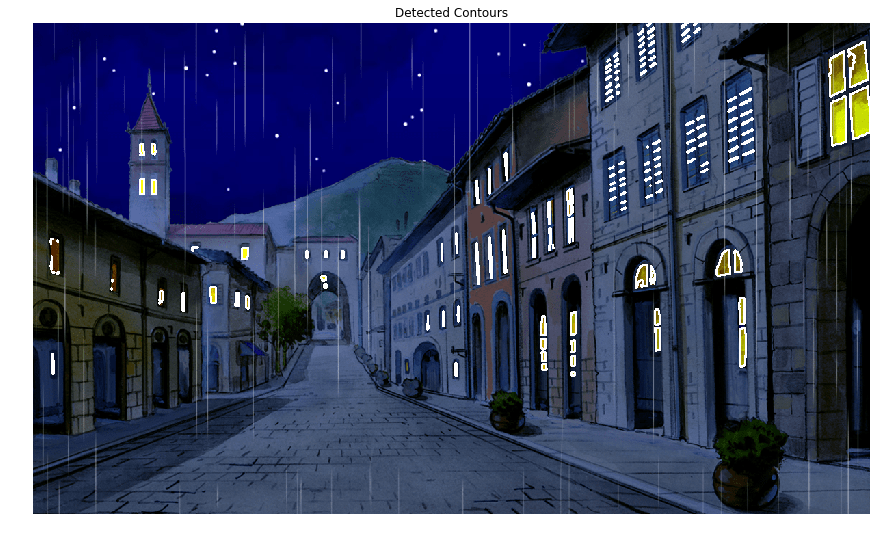

In [10]:
plt.figure(figsize=(15, 15))
plt.imshow(contour_img[..., ::-1])
plt.title('Detected Contours')
plt.axis('off')
plt.show()

In [11]:
def centroid(moment):
    x = int(moment['m10'] / moment['m00'])
    y = int(moment['m01'] / moment['m00'])
    return x, y

contour_area = [cv2.contourArea(c) for c in contours]
contour_moments = [cv2.moments(c) for c in contours]
contour_centroids = [centroid(m) for m in contour_moments]
contour_perimeters = [cv2.arcLength(c, True) for c in contours]

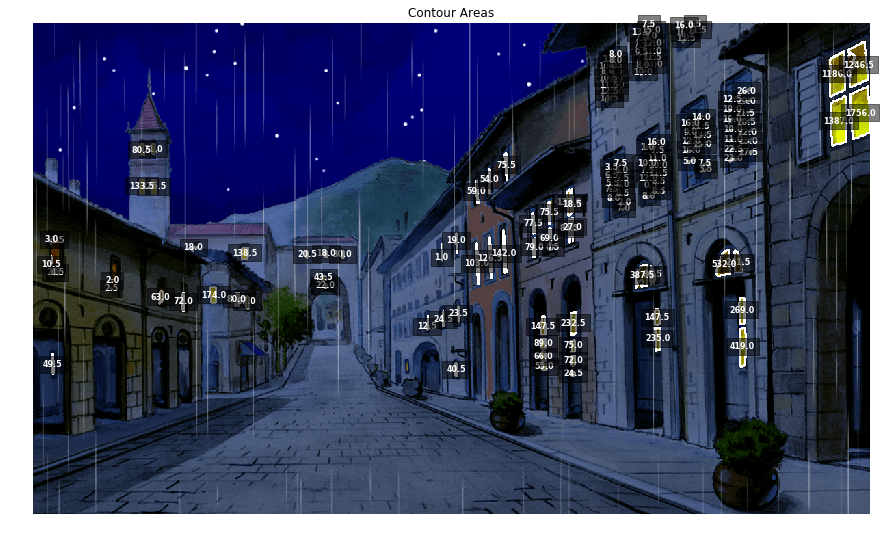

In [12]:
plt.figure(figsize=(15, 15))
plt.imshow(contour_img[..., ::-1])
for c, v in zip(contour_centroids, contour_area):
    plt.text(*c, str(v), size=8, weight='bold',
             ha='center',
             va='center',
             color='white',
             backgroundcolor='#00000080')
plt.title('Contour Areas')
plt.axis('off')
plt.show()

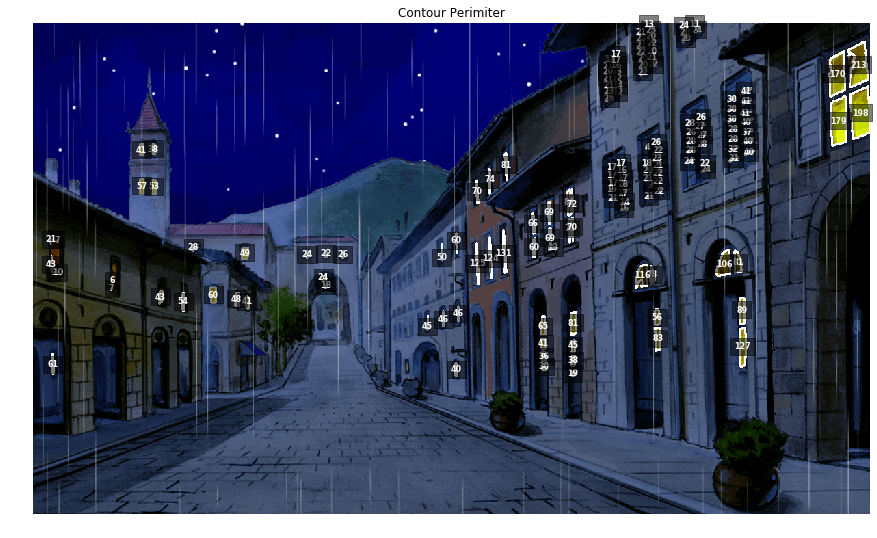

In [13]:
plt.figure(figsize=(15, 15))
plt.imshow(contour_img[..., ::-1])
for c, v in zip(contour_centroids, contour_perimeters):
    plt.text(*c, str(int(v)), size=8, weight='bold',
             ha='center',
             va='center',
             color='white',
             backgroundcolor='#00000080')
plt.title('Contour Perimiter')
plt.axis('off')
plt.show()

In [14]:
def perimeter_area_ratio(contour):
    p = cv2.arcLength(contour, True)
    a = cv2.contourArea(contour)
    return p / a

def convexity(contour):
    area = cv2.contourArea(contour)
    convex = cv2.convexHull(contour, returnPoints=True)
    convex_area = cv2.contourArea(convex)
    return area / convex_area

def circularity(contour):
    area = cv2.contourArea(contour)
    _, r = cv2.minEnclosingCircle(contour)
    circle_area = 3.1416 * r**2
    return area / circle_area

def aspect_ratio(contour):
    _, _, w, h = cv2.boundingRect(contour)
    if w > h:
        return h / w
    else:
        return w / h
    
def slope(contour):
    line = cv2.fitLine(contour, cv2.DIST_L2, 0, 0.1, 0.1)
    run, rise, _, _ = line.ravel()
    return np.arctan(rise / run)

contour_pa_ratio = [perimeter_area_ratio(c) for c in contours]
contour_convexity = [convexity(c) for c in contours]
contour_circularity = [circularity(c) for c in contours]
contour_ap_ratio = [aspect_ratio(c) for c in contours]
contour_slope = [slope(c) for c in contours]

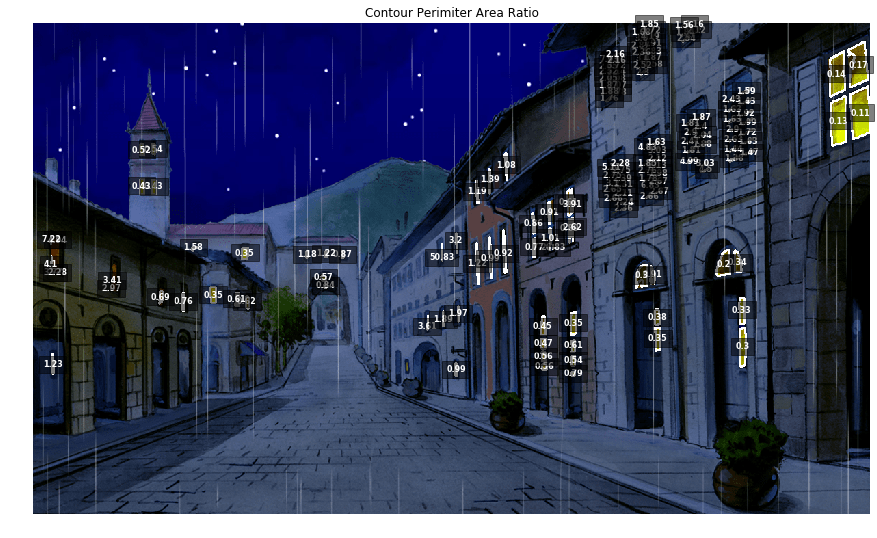

In [15]:
plt.figure(figsize=(15, 15))
plt.imshow(contour_img[..., ::-1])
for c, v in zip(contour_centroids, contour_pa_ratio):
    plt.text(*c, str(round(v, 2)), size=8, weight='bold',
             ha='center',
             va='center',
             color='white',
             backgroundcolor='#00000080')
plt.title('Contour Perimiter Area Ratio')
plt.axis('off')
plt.show()

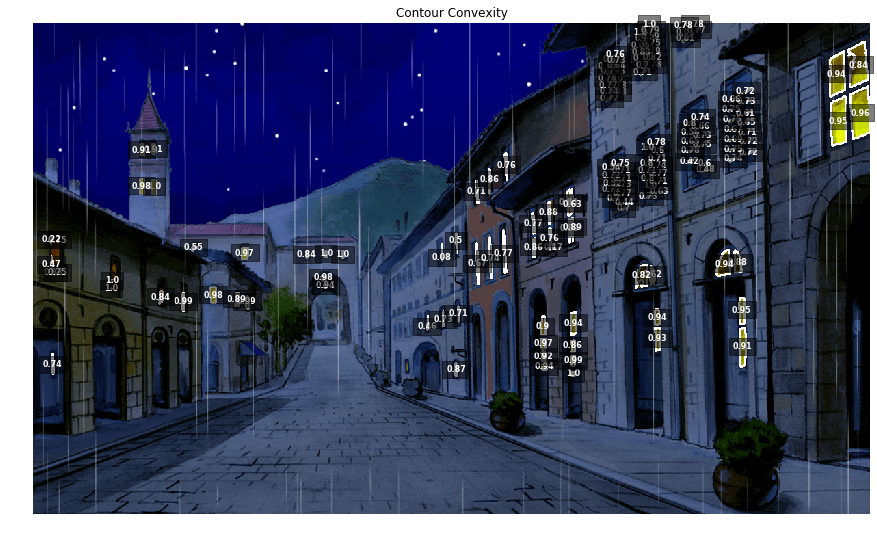

In [16]:
plt.figure(figsize=(15, 15))
plt.imshow(contour_img[..., ::-1])
for c, v in zip(contour_centroids, contour_convexity):
    plt.text(*c, str(round(v, 2)), size=8, weight='bold',
             ha='center',
             va='center',
             color='white',
             backgroundcolor='#00000080')
plt.title('Contour Convexity')
plt.axis('off')
plt.show()

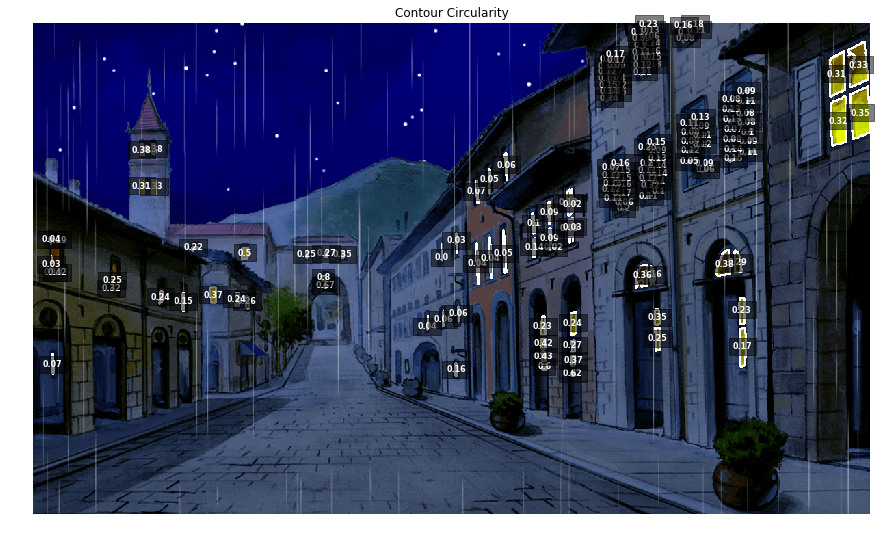

In [17]:
plt.figure(figsize=(15, 15))
plt.imshow(contour_img[..., ::-1])
for c, v in zip(contour_centroids, contour_circularity):
    plt.text(*c, str(round(v, 2)), size=8, weight='bold',
             ha='center',
             va='center',
             color='white',
             backgroundcolor='#00000080')
plt.title('Contour Circularity')
plt.axis('off')
plt.show()

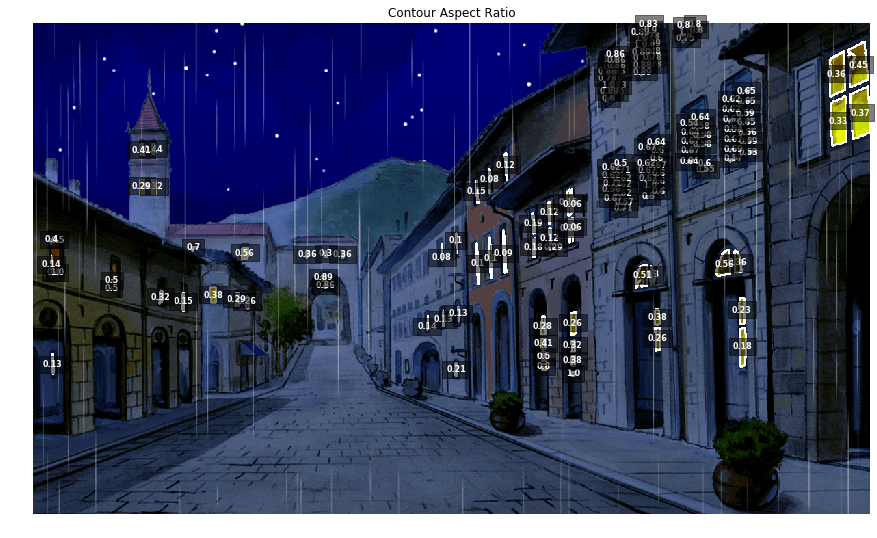

In [18]:
plt.figure(figsize=(15, 15))
plt.imshow(contour_img[..., ::-1])
for c, v in zip(contour_centroids, contour_ap_ratio):
    plt.text(*c, str(round(v, 2)), size=8, weight='bold',
             ha='center',
             va='center',
             color='white',
             backgroundcolor='#00000080')
plt.title('Contour Aspect Ratio')
plt.axis('off')
plt.show()

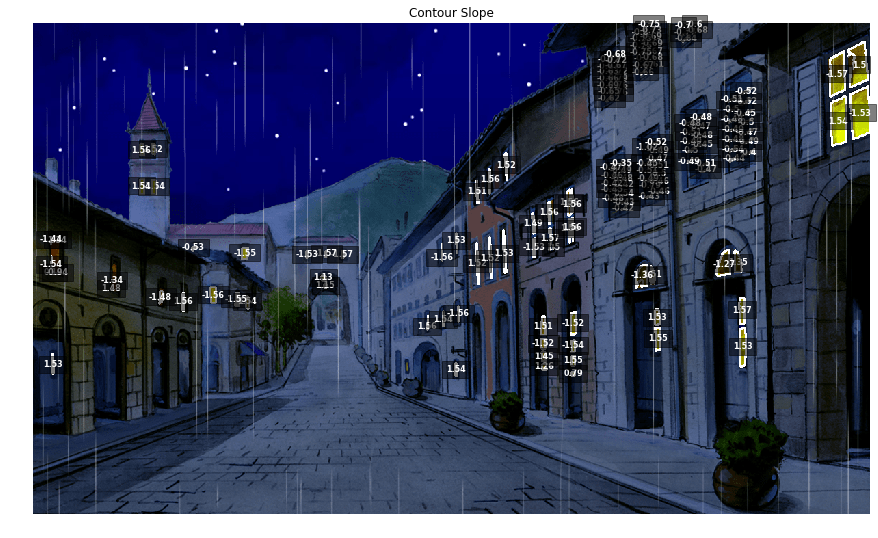

In [19]:
plt.figure(figsize=(15, 15))
plt.imshow(contour_img[..., ::-1])
for c, v in zip(contour_centroids, contour_slope):
    plt.text(*c, str(round(v, 2)), size=8, weight='bold',
             ha='center',
             va='center',
             color='white',
             backgroundcolor='#00000080')
plt.title('Contour Slope')
plt.axis('off')
plt.show()